# [ava 多线程编程](https://www.runoob.com/java/java-multithreading.html)
Java 给多线程编程提供了内置的支持。 一条线程指的是进程中一个单一顺序的控制流，一个进程中可以并发多个线程，每条线程并行执行不同的任务。

多线程是多任务的一种特别的形式，但多线程使用了更小的资源开销。

这里定义和线程相关的另一个术语 - 进程：一个进程包括由操作系统分配的内存空间，包含一个或多个线程。一个线程不能独立的存在，它必须是进程的一部分。一个进程一直运行，直到所有的非守护线程都结束运行后才能结束。

多线程能满足程序员编写高效率的程序来达到充分利用 CPU 的目的。

## 一个线程的生命周期
线程是一个动态执行的过程，它也有一个从产生到死亡的过程。

下图显示了一个线程完整的生命周期。
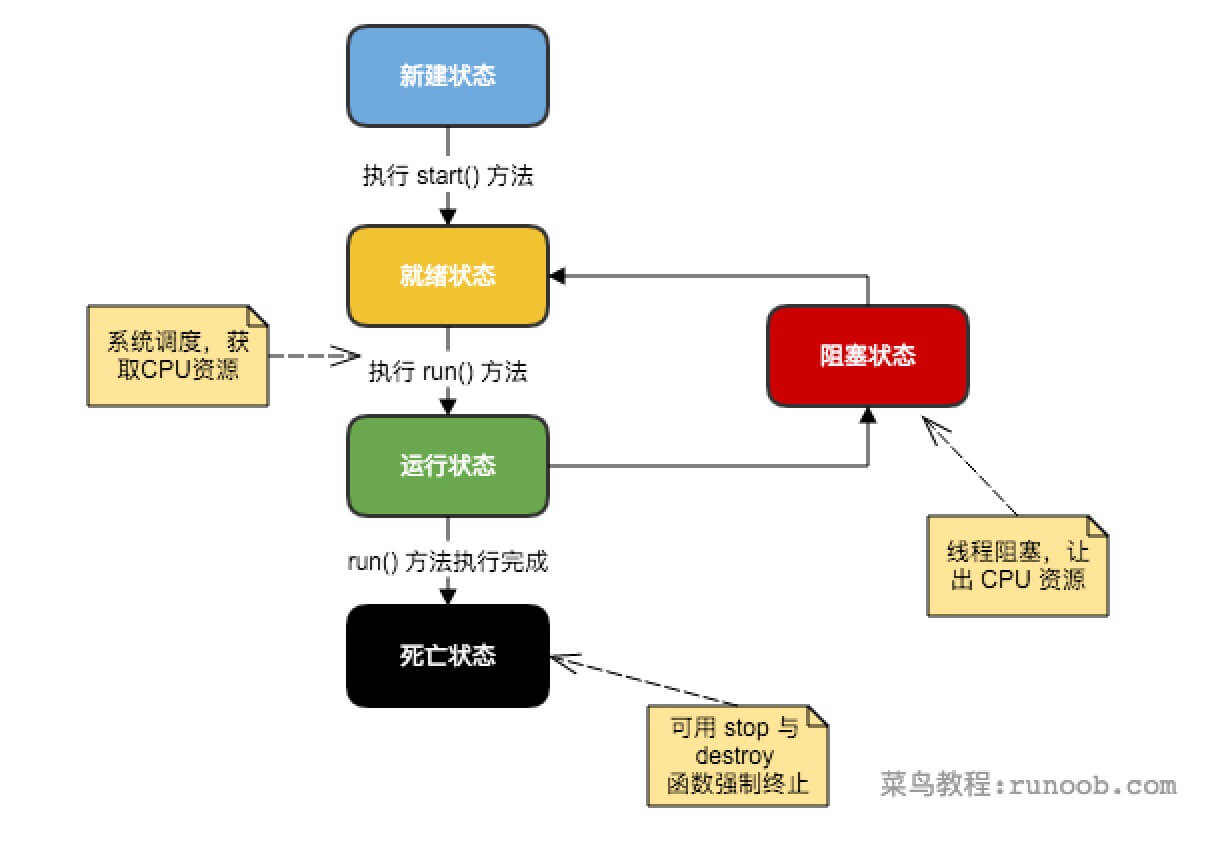

- **新建状态**:

使用 `new` 关键字和 `Thread` 类或其子类建立一个线程对象后，该线程对象就处于新建状态。它保持这个状态直到程序 `start()` 这个线程。

- **就绪状态**:

当线程对象调用了 `start()` 方法之后，该线程就进入就绪状态。就绪状态的线程处于就绪队列中，要等待JVM里线程调度器的调度。

- **运行状态**:

如果就绪状态的线程获取 CPU 资源，就可以执行 `run()`，此时线程便处于运行状态。处于运行状态的线程最为复杂，它可以变为阻塞状态、就绪状态和死亡状态。

- **阻塞状态**:

如果一个线程执行了sleep（睡眠）、suspend（挂起）等方法，失去所占用资源之后，该线程就从运行状态进入阻塞状态。在睡眠时间已到或获得设备资源后可以重新进入就绪状态。可以分为三种：

1. 等待阻塞：运行状态中的线程执行 `wait()` 方法，使线程进入到等待阻塞状态。

2. 同步阻塞：线程在获取 `synchronized` 同步锁失败(因为同步锁被其他线程占用)。

3. 其他阻塞：通过调用线程的 `sleep()` 或 `join()` 发出了 I/O 请求时，线程就会进入到阻塞状态。当 `sleep()` 状态超时，`join()` 等待线程终止或超时，或者 I/O 处理完毕，线程重新转入就绪状态。

- **死亡状态**:

一个运行状态的线程完成任务或者其他终止条件发生时，该线程就切换到终止状态。

## 线程的优先级
每一个 Java 线程都有一个优先级，这样有助于操作系统确定线程的调度顺序。

Java 线程的优先级是一个整数，其取值范围是 `1 （Thread.MIN_PRIORITY ） - 10 （Thread.MAX_PRIORITY ）`。

默认情况下，每一个线程都会分配一个优先级 `NORM_PRIORITY（5）`。

具有较高优先级的线程对程序更重要，并且应该在低优先级的线程之前分配处理器资源。但是，线程优先级不能保证线程执行的顺序，而且非常依赖于平台。

## 创建一个线程
Java 提供了三种创建线程的方法：
- 通过实现 Runnable 接口；
- 通过继承 Thread 类本身；
- 通过 Callable 和 Future 创建线程。

### 通过实现 Runnable 接口来创建线程
创建一个线程，最简单的方法是创建一个实现 `Runnable` 接口的类。

为了实现 `Runnable`，一个类只需要执行一个方法调用 `run()`，声明如下：
```java
public void run()
```
你可以重写该方法，重要的是理解的 `run()` 可以调用其他方法，使用其他类，并声明变量，就像主线程一样。

在创建一个实现 `Runnable` 接口的类之后，你可以在类中实例化一个线程对象。

`Thread` 定义了几个构造方法，下面的这个是我们经常使用的：
```java
Thread(Runnable threadOb,String threadName);
```
这里，`threadOb` 是一个实现 `Runnable` 接口的类的实例，并且 `threadName` 指定新线程的名字。

新线程创建之后，你调用它的 `start()` 方法它才会运行。
```java
void start();
```
下面是一个创建线程并开始让它执行的实例：

In [ ]:
class RunnableDemo implements Runnable {
   private Thread t;
   private String threadName;
   
   RunnableDemo( String name) {
      threadName = name;
      System.out.println("Creating " +  threadName );
   }
   
   public void run() {
      System.out.println("Running " +  threadName );
      try {
         for(int i = 4; i > 0; i--) {
            System.out.println("Thread: " + threadName + ", " + i);
            // 让线程睡眠一会
            Thread.sleep(50);
         }
      }catch (InterruptedException e) {
         System.out.println("Thread " +  threadName + " interrupted.");
      }
      System.out.println("Thread " +  threadName + " exiting.");
   }
   
   public void start () {
      System.out.println("Starting " +  threadName );
      if (t == null) {
         t = new Thread (this, threadName);
         t.start ();
      }
   }
}

In [ ]:
public class TestThread {
   public static void main() {
      RunnableDemo R1 = new RunnableDemo( "Thread-1");
      R1.start();
      
      RunnableDemo R2 = new RunnableDemo( "Thread-2");
      R2.start();
   }   
}

TestThread.main();

### 通过继承Thread来创建线程
创建一个线程的第二种方法是创建一个新的类，该类继承 Thread 类，然后创建一个该类的实例。

继承类必须重写 `run()` 方法，该方法是新线程的入口点。它也必须调用 `start()` 方法才能执行。

该方法尽管被列为一种多线程实现方式，但是本质上也是实现了 Runnable 接口的一个实例。

In [ ]:
class ThreadDemo extends Thread {
   private Thread t;
   private String threadName;
   
   ThreadDemo( String name) {
      threadName = name;
      System.out.println("Creating " +  threadName );
   }
   
   public void run() {
      System.out.println("Running " +  threadName );
      try {
         for(int i = 4; i > 0; i--) {
            System.out.println("Thread: " + threadName + ", " + i);
            // 让线程睡眠一会
            Thread.sleep(50);
         }
      }catch (InterruptedException e) {
         System.out.println("Thread " +  threadName + " interrupted.");
      }
      System.out.println("Thread " +  threadName + " exiting.");
   }
   
   public void start () {
      System.out.println("Starting " +  threadName );
      if (t == null) {
         t = new Thread (this, threadName);
         t.start ();
      }
   }
}

In [ ]:
public class TestThread {
 
   public static void main() {
      ThreadDemo T1 = new ThreadDemo( "Thread-1");
      T1.start();
      
      ThreadDemo T2 = new ThreadDemo( "Thread-2");
      T2.start();
   }   
}

TestThread.main();

### Thread 方法
下表列出了Thread类的一些重要方法：

| **序号** |                    **方法**                     | 描述                                                         |
| :------- | :--------------------------------------------- |:------------------------------------------------------------ |
| 1        |             **public void start()**             | 使该线程开始执行；**Java** 虚拟机调用该线程的 run 方法。     |
| 2        |              **public void run()**              | 如果该线程是使用独立的 Runnable 运行对象构造的，则调用该 Runnable 对象的 run 方法；否则，该方法不执行任何操作并返回。 |
| 3        |   **public final void setName(String name)**    | 改变线程名称，使之与参数 name 相同。                         |
| 4        | **public final void setPriority(int priority)** | 更改线程的优先级。                                           |
| 5        |   **public final void setDaemon(boolean on)**   | 将该线程标记为守护线程或用户线程。                           |
| 6        |    **public final void join(long millisec)**    | 等待该线程终止的时间最长为 millis 毫秒。                     |
| 7        |           **public void interrupt()**           | 中断线程。                                                   |
| 8        |       **public final boolean isAlive()**        | 测试线程是否处于活动状态。                                   |

测试线程是否处于活动状态。 上述方法是被Thread对象调用的。下面的方法是Thread类的静态方法。

| **序号** |                   **方法**                    | 描述                                                         |
| :------- | :------------------------------------------- |:------------------------------------------------------------ |
| 1        |        **public static void yield()**         | 暂停当前正在执行的线程对象，并执行其他线程。                 |
| 2        |  **public static void sleep(long millisec)**  | 在指定的毫秒数内让当前正在执行的线程休眠（暂停执行），此操作受到系统计时器和调度程序精度和准确性的影响。 |
| 3        | **public static boolean holdsLock(Object x)** | 当且仅当当前线程在指定的对象上保持监视器锁时，才返回 true。  |
| 4        |   **public static Thread currentThread()**    | 返回对当前正在执行的线程对象的引用。                         |
| 5        |      **public static void dumpStack()**       | 将当前线程的堆栈跟踪打印至标准错误流。                       |

#### 实例
如下的ThreadClassDemo 程序演示了Thread类的一些方法：

In [ ]:
// 文件名 : DisplayMessage.java
// 通过实现 Runnable 接口创建线程
public class DisplayMessage implements Runnable {
   private String message;
   
   public DisplayMessage(String message) {
      this.message = message;
   }
   
   public void run() {
      while(true) {
         System.out.println(message);
      }
   }
}

In [ ]:
// 文件名 : GuessANumber.java
// 通过继承 Thread 类创建线程
 
public class GuessANumber extends Thread {
   private int number;
   public GuessANumber(int number) {
      this.number = number;
   }
   
   public void run() {
      int counter = 0;
      int guess = 0;
      do {
         guess = (int) (Math.random() * 10 + 1);
         System.out.println(this.getName() + " guesses " + guess);
         counter++;
      } while(guess != number);
      System.out.println("** Correct!" + this.getName() + "in" + counter + "guesses.**");
   }
}

In [ ]:
// 文件名 : ThreadClassDemo.java
public class ThreadClassDemo {
 
   public static void main() {
      Runnable hello = new DisplayMessage("Hello");
      Thread thread1 = new Thread(hello);
      thread1.setDaemon(true);
      thread1.setName("hello");
      System.out.println("Starting hello thread...");
      thread1.start();
      
      Runnable bye = new DisplayMessage("Goodbye");
      Thread thread2 = new Thread(bye);
      thread2.setPriority(Thread.MIN_PRIORITY);
      thread2.setDaemon(true);
      System.out.println("Starting goodbye thread...");
      thread2.start();
 
      System.out.println("Starting thread3...");
      Thread thread3 = new GuessANumber(4);
      thread3.start();
      try {
         thread3.join();
      }catch(InterruptedException e) {
         System.out.println("Thread interrupted.");
      }
      System.out.println("Starting thread4...");
      Thread thread4 = new GuessANumber(6);
      
      thread4.start();
      System.out.println("main() is ending...");
   }
}

In [ ]:
ThreadClassDemo.main();

### 通过 Callable 和 Future 创建线程
1. 创建 Callable 接口的实现类，并实现 call() 方法，该 call() 方法将作为线程执行体，并且有返回值。
2. 创建 Callable 实现类的实例，使用 FutureTask 类来包装 Callable 对象，该 FutureTask 对象封装了该 Callable 对象的 call() 方法的返回值。
3. 使用 FutureTask 对象作为 Thread 对象的 target 创建并启动新线程。
4. 调用 FutureTask 对象的 get() 方法来获得子线程执行结束后的返回值。

In [1]:
public class CallableThreadTest implements Callable<Integer> {
    public static void main()  
    {  
        CallableThreadTest ctt = new CallableThreadTest();  
        FutureTask<Integer> ft = new FutureTask<>(ctt);  
        for(int i = 0;i < 100;i++)  
        {  
            System.out.println(Thread.currentThread().getName()+" 的循环变量i的值"+i);  
            if(i==20)  
            {  
                new Thread(ft,"有返回值的线程").start();  
            }  
        }  
        try  
        {  
            System.out.println("子线程的返回值："+ft.get());  
        } catch (InterruptedException e)  
        {  
            e.printStackTrace();  
        } catch (ExecutionException e)  
        {  
            e.printStackTrace();  
        }  
  
    }
    @Override  
    public Integer call() throws Exception  
    {  
        int i = 0;  
        for(;i<100;i++)  
        {  
            System.out.println(Thread.currentThread().getName()+" "+i);  
        }  
        return i;  
    }  
}

In [2]:
CallableThreadTest.main();

IJava-executor-0 的循环变量i的值0
IJava-executor-0 的循环变量i的值1
IJava-executor-0 的循环变量i的值2
IJava-executor-0 的循环变量i的值3
IJava-executor-0 的循环变量i的值4
IJava-executor-0 的循环变量i的值5
IJava-executor-0 的循环变量i的值6
IJava-executor-0 的循环变量i的值7
IJava-executor-0 的循环变量i的值8
IJava-executor-0 的循环变量i的值9
IJava-executor-0 的循环变量i的值10
IJava-executor-0 的循环变量i的值11
IJava-executor-0 的循环变量i的值12
IJava-executor-0 的循环变量i的值13
IJava-executor-0 的循环变量i的值14
IJava-executor-0 的循环变量i的值15
IJava-executor-0 的循环变量i的值16
IJava-executor-0 的循环变量i的值17
IJava-executor-0 的循环变量i的值18
IJava-executor-0 的循环变量i的值19
IJava-executor-0 的循环变量i的值20
IJava-executor-0 的循环变量i的值21
IJava-executor-0 的循环变量i的值22
IJava-executor-0 的循环变量i的值23
IJava-executor-0 的循环变量i的值24
IJava-executor-0 的循环变量i的值25
IJava-executor-0 的循环变量i的值26
IJava-executor-0 的循环变量i的值27
IJava-executor-0 的循环变量i的值28
IJava-executor-0 的循环变量i的值29
IJava-executor-0 的循环变量i的值30
IJava-executor-0 的循环变量i的值31
IJava-executor-0 的循环变量i的值32
IJava-executor-0 的循环变量i的值33
IJava-executor-0 的循环变量i的值34
IJava-executor-0 的循环变量i的值35
IJ

## 创建线程的三种方式的对比
1. 采用实现 Runnable、Callable 接口的方式创建多线程时，线程类只是实现了 Runnable 接口或 Callable 接口，还可以继承其他类。
2. 使用继承 Thread 类的方式创建多线程时，编写简单，如果需要访问当前线程，则无需使用 Thread.currentThread() 方法，直接使用 this 即可获得当前线程。

## 线程的几个主要概念
在多线程编程时，你需要了解以下几个概念：
- 线程同步
- 线程间通信
- 线程死锁
- 线程控制：挂起、停止和恢复

## 多线程的使用
有效利用多线程的关键是理解程序是并发执行而不是串行执行的。例如：程序中有两个子系统需要并发执行，这时候就需要利用多线程编程。

通过对多线程的使用，可以编写出非常高效的程序。不过请注意，如果你创建太多的线程，程序执行的效率实际上是降低了，而不是提升了。

请记住，上下文的切换开销也很重要，如果你创建了太多的线程，CPU 花费在上下文的切换的时间将多于执行程序的时间！